# 5.1 Classification 

**Goal**: Predict whether a given day’s energy consumption is “High” or “Low” compared to the household’s average.

● Target variable: Binary (1 = High consumption, 0 = Normal).

● Evaluation: Accuracy, F1-score, ROC-AUC.

In [113]:
import pandas as pd

daily = pd.read_csv("daily_household.csv")

In [114]:
household_avg = daily["Global_active_power"].mean()

daily["Target"] = (daily["Global_active_power"] > household_avg).astype(int)

daily.dropna(inplace=True)
daily.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,peak_hour_power,night_time_usage,...,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,is_working_Day,Target
0,2006-12-16,20.152933,34.922,236.243763,13.082828,0.000,0.546,4.926,7.706,1017.334,...,False,False,False,False,False,False,False,True,0,0
1,2006-12-17,56.507667,226.006,240.087028,9.999028,2.033,4.187,13.341,7.064,267.578,...,True,False,False,False,False,False,False,True,0,1
2,2006-12-18,36.730433,161.792,241.231694,6.421667,1.063,2.621,14.018,6.158,344.776,...,False,False,False,False,False,False,False,True,1,1
3,2006-12-19,27.769900,150.942,241.999313,4.926389,0.839,7.602,6.197,7.840,208.098,...,False,False,True,False,False,False,False,True,1,1
4,2006-12-20,37.095800,160.998,242.308063,6.467361,0.000,2.648,14.063,5.988,629.370,...,False,False,False,True,False,False,False,True,1,1


In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


X = daily.drop(columns=["Global_active_power", "Target", "Datetime", "Global_intensity"])
y = daily["Target"]

train_size = int(len(daily) * 0.7)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [116]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print(f"Auc:  {roc_auc_score(y_test, predictions)*100:.2f}%")

[[187  30]
 [ 29 187]]


              precision    recall  f1-score   support

           0       0.87      0.86      0.86       217
           1       0.86      0.87      0.86       216

    accuracy                           0.86       433
   macro avg       0.86      0.86      0.86       433
weighted avg       0.86      0.86      0.86       433

Auc:  86.37%


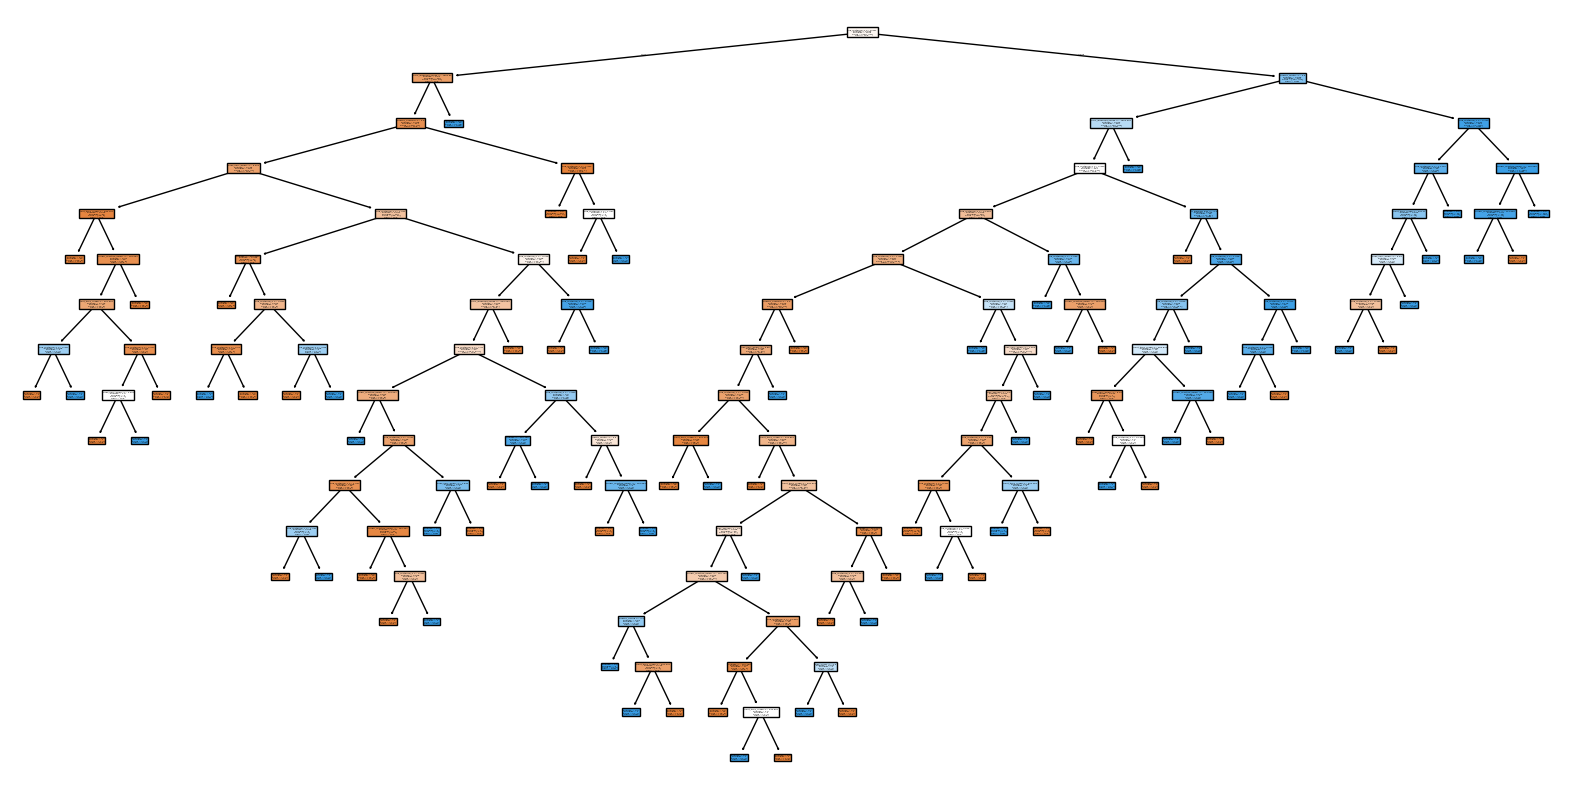

In [117]:
from sklearn import tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
tree.plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['Low','High'])
plt.show()

In [118]:
from sklearn.ensemble import RandomForestClassifier


model=RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print(f"Auc:  {roc_auc_score(y_test, predictions)*100:.2f}%")

[[202  15]
 [ 32 184]]


              precision    recall  f1-score   support

           0       0.86      0.93      0.90       217
           1       0.92      0.85      0.89       216

    accuracy                           0.89       433
   macro avg       0.89      0.89      0.89       433
weighted avg       0.89      0.89      0.89       433

Auc:  89.14%
